<a href="https://colab.research.google.com/github/debdatta23/Network_Anomaly/blob/main/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [ ]:
df = pd.read_csv('/kdd-cup-1999-data.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,http,SF,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298800,0,tcp,http,SF,243.0,671.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
298801,0,tcp,http,SF,252.0,2107.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,normal.
298802,0,tcp,http,SF,249.0,256.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
298803,0,tcp,http,SF,247.0,1125.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


## Data Preparetion

In [ ]:
df.columns=['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate','target_variable']

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_variable
0,0,tcp,http,SF,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


## Exploratory Data Analysis

### Data Description

In [ ]:
print("The amount of total instances is::",df.shape[0])
print("The number of features is::",df.shape[1]-1)


The amount of total instances is:: 298805
The number of features is:: 41


In [ ]:
df['target_variable'].value_counts()


,count
target_variable,
normal.,260576
smurf.,36944
ipsweep.,924
portsweep.,169
teardrop.,99
guess_passwd.,53
pod.,20
neptune.,15
buffer_overflow.,2


## Filtering classes under evaluation

In [ ]:
data = df[df['target_variable'].isin(['normal.', 'neptune.', 'smurf.'])]


In [ ]:
data['target_variable'].value_counts()

,count
target_variable,
normal.,260576
smurf.,36944
neptune.,15


In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_variable
0,0,tcp,http,SF,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298799,0,tcp,http,SF,252.0,250.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
298800,0,tcp,http,SF,243.0,671.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
298801,0,tcp,http,SF,252.0,2107.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,normal.
298802,0,tcp,http,SF,249.0,256.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_variable
0,0,tcp,http,SF,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297530,0,tcp,http,SF,252.0,250.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
297531,0,tcp,http,SF,243.0,671.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
297532,0,tcp,http,SF,252.0,2107.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,normal.
297533,0,tcp,http,SF,249.0,256.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print("The amount of total instances is::",data.shape[0])
print("The number of features is::",data.shape[1]-1)


The amount of total instances is:: 297535
The number of features is:: 41


In [ ]:
data.shape

(297535, 42)

In [ ]:
result = data.copy()  #.sample(frac=1)
for i in result.columns:
    if result[i].dtype == "object":
        encs= LabelEncoder()
        result[i] = encs.fit_transform(result[i])


In [ ]:
result.shape

(297535, 42)

## Normalize the data

In [ ]:
X=result.drop(['target_variable'],axis=1)

In [ ]:
Y=result['target_variable']

In [ ]:
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.5625,1.0,0.000098,0.003843,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.5625,1.0,0.000074,0.000386,0.0,0.0,0.0,0.0,...,0.003922,0.003922,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.5625,1.0,0.000108,0.000105,0.0,0.0,0.0,0.0,...,0.007843,0.007843,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.5625,1.0,0.000106,0.000173,0.0,0.0,0.0,0.0,...,0.011765,0.011765,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.5625,1.0,0.000109,0.000041,0.0,0.0,0.0,0.0,...,0.015686,0.015686,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297530,0.0,0.5,0.5625,1.0,0.000115,0.000021,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
297531,0.0,0.5,0.5625,1.0,0.000111,0.000057,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
297532,0.0,0.5,0.5625,1.0,0.000115,0.000180,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0
297533,0.0,0.5,0.5625,1.0,0.000113,0.000022,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


## Train-Test Split

## Train -Test Classwise Data Distribution

In [ ]:
X = result.drop('target_variable', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
# Predict anomalies
y_pred = model.predict(X_scaled)
# The output is -1 for anomalies and 1 for normal points

# Add predictions to the original data
result['anomaly'] = y_pred


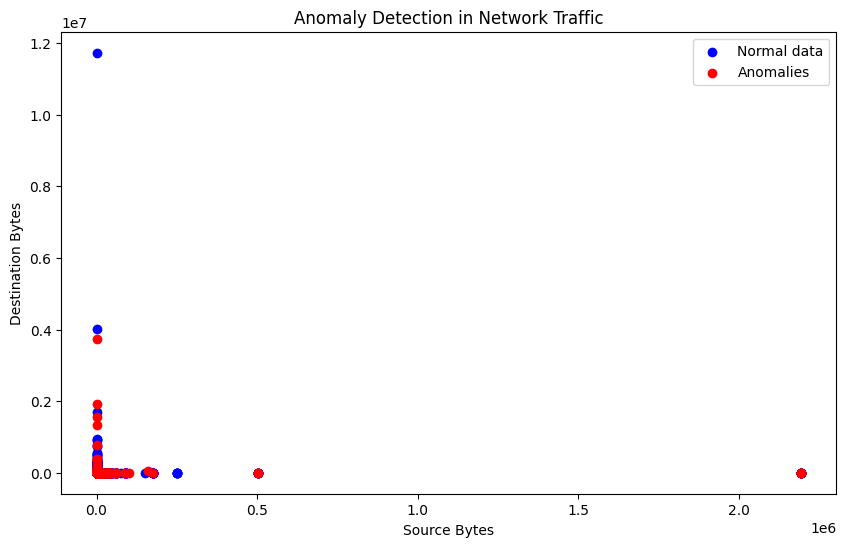

anomaly
 1    294559
-1      2976
Name: count, dtype: int64


In [ ]:
anomaly_count = result['anomaly'].value_counts()

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(result[result['anomaly'] == 1]['src_bytes'], result[result['anomaly'] == 1]['dst_bytes'], color='blue', label='Normal data')
plt.scatter(result[result['anomaly'] == -1]['src_bytes'], result[result['anomaly'] == -1]['dst_bytes'], color='red', label='Anomalies')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Anomaly Detection in Network Traffic')
plt.legend()
plt.show()

# Print the number of anomalies detected
print(anomaly_count)